<a href="https://colab.research.google.com/github/samitha278/Pattern-Recognition/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [60]:
np.random.seed(42)

# Main cluster of data points (horizontal trend around y=0)
n_main = 50
x_main = np.random.uniform(0, 10, n_main)
y_main = np.random.normal(0, 15, n_main)  # Horizontal trend with noise

# Add outliers
outliers_x = np.array([1, 9, 10, 10.5])
outliers_y = np.array([-150, 150, 180, 200])

# Combine all data
x_all = np.concatenate([x_main, outliers_x])
y_all = np.concatenate([y_main, outliers_y])

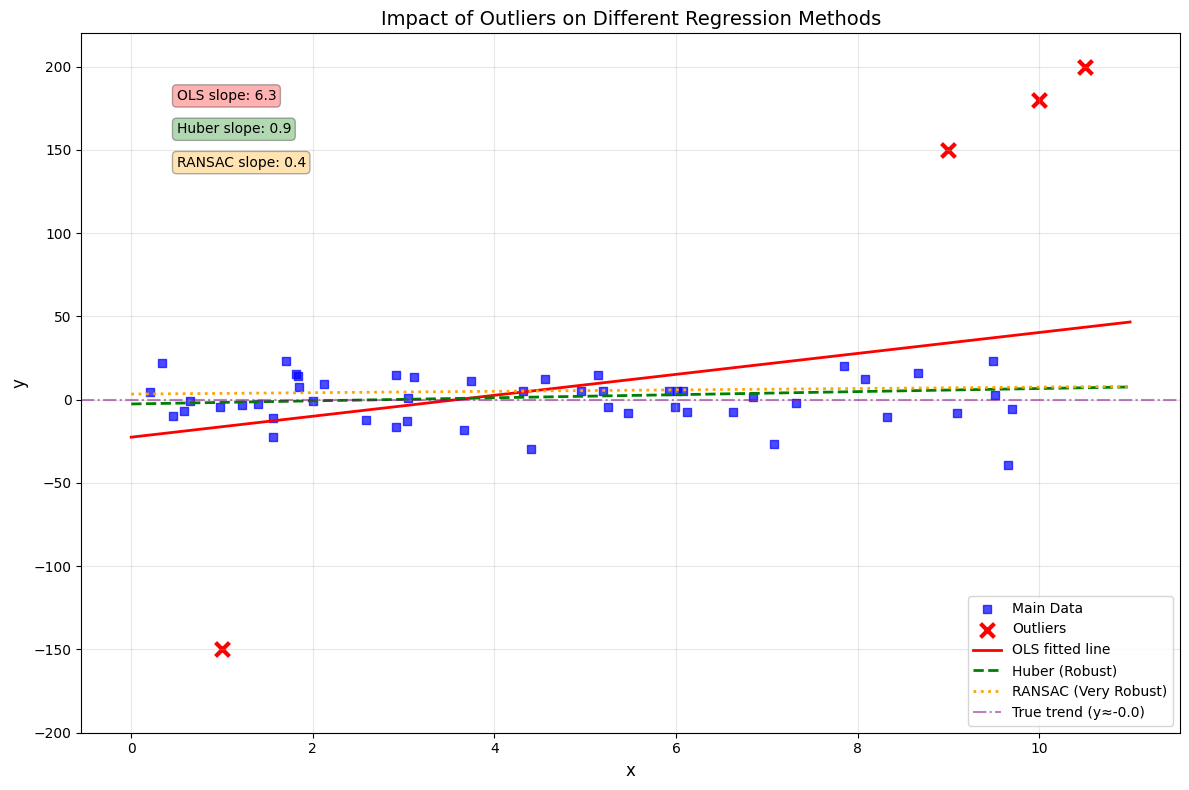

In [61]:
# Identify outliers for plotting
is_outlier = np.concatenate([np.zeros(n_main, dtype=bool), np.ones(len(outliers_x), dtype=bool)])

# Reshape for sklearn
X = x_all.reshape(-1, 1)
y = y_all

# Fit different regression models
ols = LinearRegression()
huber = HuberRegressor(epsilon=1.35)  # Robust to outliers
ransac = RANSACRegressor(random_state=42)  # Very robust to outliers

ols.fit(X, y)
huber.fit(X, y)
ransac.fit(X, y)

# Generate points for plotting the fitted lines
x_plot = np.linspace(0, 11, 100).reshape(-1, 1)
y_ols = ols.predict(x_plot)
y_huber = huber.predict(x_plot)
y_ransac = ransac.predict(x_plot)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot main data points
plt.scatter(x_all[~is_outlier], y_all[~is_outlier],
           color='blue', marker='s', s=40, label='Main Data', alpha=0.7)

# Plot outliers
plt.scatter(x_all[is_outlier], y_all[is_outlier],
           color='red', marker='x', s=100, label='Outliers', linewidth=3)

# Plot fitted lines
plt.plot(x_plot, y_ols, 'r-', linewidth=2, label='OLS fitted line')
plt.plot(x_plot, y_huber, 'g--', linewidth=2, label='Huber (Robust)')
plt.plot(x_plot, y_ransac, 'orange', linestyle=':', linewidth=2, label='RANSAC (Very Robust)')

# Add a reference line through the main data cluster
main_mean_y = np.mean(y_main)
plt.axhline(y=main_mean_y, color='purple', linestyle='-.', alpha=0.5,
           label=f'True trend (y≈{main_mean_y:.1f})')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Impact of Outliers on Different Regression Methods', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-200, 220)

# Add text annotations
plt.text(0.5, 180, f'OLS slope: {ols.coef_[0]:.1f}', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.3))
plt.text(0.5, 160, f'Huber slope: {huber.coef_[0]:.1f}', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="green", alpha=0.3))
plt.text(0.5, 140, f'RANSAC slope: {ransac.estimator_.coef_[0]:.1f}', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.3))

plt.tight_layout()
plt.show()

In [62]:
print("=== Regression Results ===")
print(f"OLS Regression:")
print(f"  Slope: {ols.coef_[0]:.3f}")
print(f"  Intercept: {ols.intercept_:.3f}")
print(f"  R²: {ols.score(X, y):.3f}")

print(f"\nHuber Regression (Robust):")
print(f"  Slope: {huber.coef_[0]:.3f}")
print(f"  Intercept: {huber.intercept_:.3f}")
print(f"  R²: {huber.score(X, y):.3f}")

print(f"\nRANSAC Regression (Very Robust):")
print(f"  Slope: {ransac.estimator_.coef_[0]:.3f}")
print(f"  Intercept: {ransac.estimator_.intercept_:.3f}")
print(f"  R²: {ransac.score(X, y):.3f}")
print(f"  Inliers identified: {np.sum(ransac.inlier_mask_)}/{len(y)} points")

# Demonstrate the mathematical reason
print("\n=== Why OLS is Affected by Outliers ===")
print("OLS Loss Function: L = (1/N) * Σ(yi - ŷi)²")
print("\nSquared residuals for outliers:")
ols_predictions = ols.predict(X)
for i, is_out in enumerate(is_outlier):
    if is_out:
        residual = y[i] - ols_predictions[i]
        squared_residual = residual**2
        print(f"Point ({x_all[i]:.1f}, {y_all[i]:.0f}): residual² = {squared_residual:.0f}")

print(f"\nTotal squared error (OLS): {np.sum((y - ols_predictions)**2):.0f}")
print("The large squared residuals from outliers dominate the loss function,")
print("forcing the line to 'compromise' and move away from the main data cluster.")

# Show what happens without outliers
print("\n=== Regression WITHOUT Outliers ===")
X_clean = X[~is_outlier]
y_clean = y[~is_outlier]

ols_clean = LinearRegression()
ols_clean.fit(X_clean, y_clean)

print(f"OLS on clean data:")
print(f"  Slope: {ols_clean.coef_[0]:.3f}")
print(f"  Intercept: {ols_clean.intercept_:.3f}")
print(f"  R²: {ols_clean.score(X_clean, y_clean):.3f}")
print("\nNotice how the slope is much closer to 0 (horizontal) without outliers!")

=== Regression Results ===
OLS Regression:
  Slope: 6.288
  Intercept: -22.516
  R²: 0.161

Huber Regression (Robust):
  Slope: 0.928
  Intercept: -2.571
  R²: 0.032

RANSAC Regression (Very Robust):
  Slope: 0.420
  Intercept: 3.358
  R²: 0.020
  Inliers identified: 28/54 points

=== Why OLS is Affected by Outliers ===
OLS Loss Function: L = (1/N) * Σ(yi - ŷi)²

Squared residuals for outliers:
Point (1.0, -150): residual² = 17895
Point (9.0, 150): residual² = 13439
Point (10.0, 180): residual² = 19499
Point (10.5, 200): residual² = 24491

Total squared error (OLS): 104069
The large squared residuals from outliers dominate the loss function,
forcing the line to 'compromise' and move away from the main data cluster.

=== Regression WITHOUT Outliers ===
OLS on clean data:
  Slope: -0.335
  Intercept: 1.450
  R²: 0.005

Notice how the slope is much closer to 0 (horizontal) without outliers!


In [63]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes (removed extra spaces)
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable

# Drop non-numeric columns and target column for features
X = df_filtered.select_dtypes(include=['number']).drop(['class_encoded'], axis=1)

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {X.columns.tolist()}")

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]

Features shape: (214, 4)
Target shape: (214,)
Feature columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model using saga solver
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)


Accuracy: 1.0
[[ 1.45422752 -0.93943994 -0.16571368 -0.00398663]] [-0.04793176]


In [65]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = datasets.load_iris(as_frame=True)
df = iris.frame

# Filter only two classes (like in listing)
df_filtered = df[df['target'].isin([0,1])].copy()

X = df_filtered.drop(['target'], axis=1)
y = df_filtered['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train with saga solver
logreg_saga = LogisticRegression(solver='saga', max_iter=5000)
logreg_saga.fit(X_train, y_train)
y_pred_saga = logreg_saga.predict(X_test)
print("SAGA Accuracy:", accuracy_score(y_test, y_pred_saga))

# Train with liblinear solver
logreg_lib = LogisticRegression(solver='liblinear', max_iter=5000)
logreg_lib.fit(X_train, y_train)
y_pred_lib = logreg_lib.predict(X_test)
print("Liblinear Accuracy:", accuracy_score(y_test, y_pred_lib))

SAGA Accuracy: 1.0
Liblinear Accuracy: 1.0


In [66]:
# Q7 (penguins, binary): compare liblinear vs saga with and without scaling
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load penguins and clean whitespace in column names and string values
df = sns.load_dataset("penguins")
df = df.dropna().copy()
df.columns = df.columns.str.strip()
# strip whitespace from string/object columns
for c in df.select_dtypes(include=["object"]).columns:
    df[c] = df[c].astype(str).str.strip()

# Filter to two classes: Adelie and Chinstrap (binary classification)
selected_classes = ["Adelie", "Chinstrap"]
df_filtered = df[df["species"].isin(selected_classes)].copy()

# Choose numeric features (you can add/remove features as needed)
X = df_filtered[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = df_filtered["species"]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0/1 labels
# (optional) show mapping:
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Train-test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Helper to train & evaluate a model and print results
def train_eval(name, model, Xtr, Xte, ytr, yte):
    model.fit(Xtr, ytr)
    preds = model.predict(Xte)
    acc = accuracy_score(yte, preds)
    print(f"{name} Accuracy: {acc:.6f}")
    # print coefficients and intercept for inspection (flatten for readability)
    try:
        coef = model.coef_.ravel()
        intercept = model.intercept_.ravel()
        print(" Coefs:", coef)
        print(" Intercept:", intercept)
    except Exception:
        pass
    print("-" * 50)

print("without feature scaling")
log_saga = LogisticRegression(solver="saga", max_iter=5000, random_state=42)
train_eval("SAGA (no scaling)", log_saga, X_train, X_test, y_train, y_test)

log_lib = LogisticRegression(solver="liblinear", max_iter=5000, random_state=42)
train_eval("LIBLINEAR (no scaling)", log_lib, X_train, X_test, y_train, y_test)

print("\n with StandardScaler")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_saga_scaled = LogisticRegression(solver="saga", max_iter=5000, random_state=42)
train_eval("SAGA (scaled)", log_saga_scaled, X_train_scaled, X_test_scaled, y_train, y_test)

log_lib_scaled = LogisticRegression(solver="liblinear", max_iter=5000, random_state=42)
train_eval("LIBLINEAR (scaled)", log_lib_scaled, X_train_scaled, X_test_scaled, y_train, y_test)


Label mapping: {'Adelie': np.int64(0), 'Chinstrap': np.int64(1)}
without feature scaling
SAGA (no scaling) Accuracy: 0.784615
 Coefs: [ 0.10509775 -0.00518147 -0.00967945 -0.00086879]
 Intercept: [-0.00049311]
--------------------------------------------------
LIBLINEAR (no scaling) Accuracy: 0.984615
 Coefs: [ 1.61525554 -1.09128534 -0.17962315 -0.00430951]
 Intercept: [-0.07289329]
--------------------------------------------------

 with StandardScaler
SAGA (scaled) Accuracy: 1.000000
 Coefs: [ 3.7714837  -0.622939    0.13918464 -0.74769426]
 Intercept: [-1.63330143]
--------------------------------------------------
LIBLINEAR (scaled) Accuracy: 1.000000
 Coefs: [ 3.68755413 -0.53194997  0.1225757  -0.73966253]
 Intercept: [-1.4197522]
--------------------------------------------------


In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# data
df = pd.DataFrame({'color': ['red', 'blue', 'green', 'blue', 'green']})

# 1) Label encode
le = LabelEncoder()
df['label'] = le.fit_transform(df['color'])
df['label_std'] = StandardScaler().fit_transform(df[['label']])
df['label_mm']  = MinMaxScaler().fit_transform(df[['label']])
print("Label map:", dict(zip(le.classes_, le.transform(le.classes_))))
print(df[['color','label','label_std','label_mm']], "\n")

# 2) One-hot encode
df_ohe = pd.get_dummies(df['color'], prefix='color')
df_ohe_std = StandardScaler().fit_transform(df_ohe)  #unnecessary
df_ohe_mm  = MinMaxScaler().fit_transform(df_ohe)   # unnecessary
print("One-hot:\n", pd.concat([df[['color']], df_ohe], axis=1), "\n")
print("One-hot scaled (StandardScaler):\n", pd.DataFrame(df_ohe_std, columns=df_ohe.columns), "\n")
print("One-hot scaled (MinMaxScaler):\n", pd.DataFrame(df_ohe_mm, columns=df_ohe.columns))


Label map: {'blue': np.int64(0), 'green': np.int64(1), 'red': np.int64(2)}
   color  label  label_std  label_mm
0    red      2   1.603567       1.0
1   blue      0  -1.069045       0.0
2  green      1   0.267261       0.5
3   blue      0  -1.069045       0.0
4  green      1   0.267261       0.5 

One-hot:
    color  color_blue  color_green  color_red
0    red       False        False       True
1   blue        True        False      False
2  green       False         True      False
3   blue        True        False      False
4  green       False         True      False 

One-hot scaled (StandardScaler):
    color_blue  color_green  color_red
0   -0.816497    -0.816497        2.0
1    1.224745    -0.816497       -0.5
2   -0.816497     1.224745       -0.5
3    1.224745    -0.816497       -0.5
4   -0.816497     1.224745       -0.5 

One-hot scaled (MinMaxScaler):
    color_blue  color_green  color_red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2        

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]

X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

print("Data generated successfully")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Data generated successfully
X shape: (2000, 2)
y shape: (2000,)


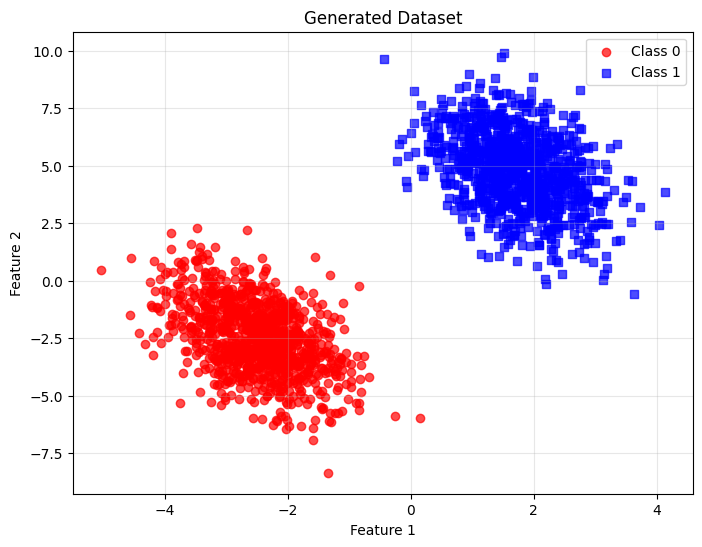

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], c='red', marker='o', alpha=0.7, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', marker='s', alpha=0.7, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Generated Dataset')
plt.grid(True, alpha=0.3)
plt.show()

In [70]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross entropy loss
def compute_loss(y, y_pred):
    m = len(y)
    return - (1/m) * np.sum(y*np.log(y_pred + 1e-9) + (1-y)*np.log(1 - y_pred + 1e-9))

def gradient_descent(X, y, lr=0.1, iters=20):
    m, n_features = X.shape

    np.random.seed(220064)
    w = np.random.normal(0, 1/np.sqrt(n_features), n_features) #Xavier initialization
    b = 0   # bias initialized to zero
    losses = []

    for i in range(iters):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        # Gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        # Update
        w -= lr * dw
        b -= lr * db
        loss = compute_loss(y, y_pred)
        losses.append(round(loss.item(), 2))

    return w, b, losses

w, b, losses = gradient_descent(X, y, lr=0.1, iters=20)

print("Final Weights:", w)
print("Final Bias:", b)
print("Loss over iterations:", losses)

Final Weights: [0.33920498 0.83306312]
Final Bias: -0.10433234889723565
Loss over iterations: [0.42, 0.31, 0.25, 0.2, 0.18, 0.15, 0.14, 0.12, 0.11, 0.1, 0.1, 0.09, 0.08, 0.08, 0.07, 0.07, 0.07, 0.06, 0.06, 0.06]


In [71]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss
def compute_loss(y, y_pred):
    m = len(y)
    return - (1/m) * np.sum(y*np.log(y_pred + 1e-9) + (1-y)*np.log(1 - y_pred + 1e-9))

# Newton's Method for Logistic Regression
def newtons_method(X, y, iters=20):
    m, n_features = X.shape

    # Xavier initialization
    np.random.seed(220064)
    w = np.random.normal(0, 1/np.sqrt(n_features), n_features)
    b = 0
    losses = []

    for i in range(iters):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Gradient
        grad_w = (1/m) * np.dot(X.T, (y_pred - y))
        grad_b = (1/m) * np.sum(y_pred - y)
        # Hessian
        S = np.diag((y_pred * (1 - y_pred)))
        H = (1/m) * np.dot(X.T, np.dot(S, X))

        # Update weights using Newton's method
        H_inv = np.linalg.pinv(H)
        w -= np.dot(H_inv, grad_w)
        b -= grad_b / np.mean(np.diag(S))

        # Store loss
        loss = compute_loss(y, y_pred)
        losses.append(round(loss.item(), 2))

    return w, b, losses

w_newton, b_newton, losses_newton = newtons_method(X, y, iters=20)

print("Final Weights:", w_newton)
print("Final Bias:", b_newton)
print("Loss over iterations:", losses_newton)

Final Weights: [12.84021279  3.78388949]
Final Bias: -1.1508294697920602
Loss over iterations: [0.42, 0.1, 0.04, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


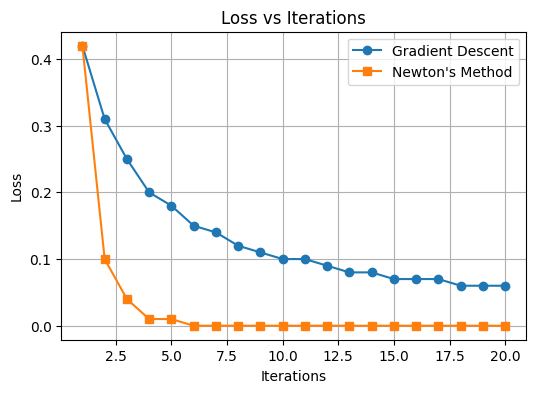

In [72]:
import matplotlib.pyplot as plt

_, _, losses_gd = gradient_descent(X, y, lr=0.1, iters=20)
_, _, losses_newton = newtons_method(X, y, iters=20)

plt.figure(figsize=(6,4))
plt.plot(range(1, 21), losses_gd, label="Gradient Descent", marker='o')
plt.plot(range(1, 21), losses_newton, label="Newton's Method", marker='s')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.legend()
plt.grid(True)
plt.show()


In [73]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

def compute_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def batch_gradient_descent(X, y, learning_rate=0.01, max_iterations=1000):
    X_with_intercept = np.c_[np.ones(X.shape[0]), X]
    weights = np.random.normal(0, 0.01, X_with_intercept.shape[1])
    losses = []

    for i in range(max_iterations):
        z = np.dot(X_with_intercept, weights)
        predictions = sigmoid(z)
        loss = compute_loss(y, predictions)
        losses.append(loss)

        gradient = np.dot(X_with_intercept.T, (predictions - y)) / len(y)
        weights -= learning_rate * gradient

        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss:.6f}")

    return weights, losses

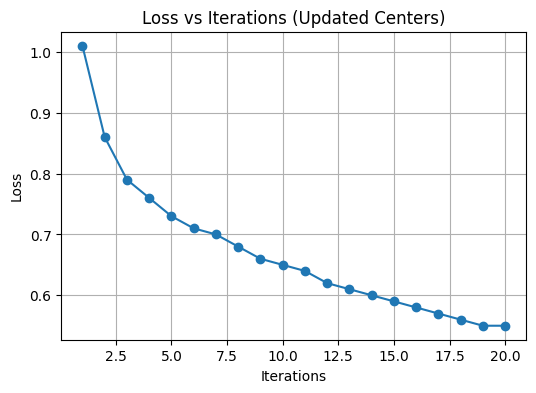

In [74]:
# Generate new dataset with updated centers
np.random.seed(0)
centers = [[2, 2], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

w_new, b_new, losses_new = gradient_descent(X, y, lr=0.1, iters=20)

plt.figure(figsize=(6,4))
plt.plot(range(1, 21), losses_new, marker='o')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations (Updated Centers)")
plt.grid(True)
plt.show()

In [75]:
def newtons_method(X, y, max_iterations=20):
    X_with_intercept = np.c_[np.ones(X.shape[0]), X]
    weights = np.random.normal(0, 0.01, X_with_intercept.shape[1])
    losses = []

    for i in range(max_iterations):
        z = np.dot(X_with_intercept, weights)
        predictions = sigmoid(z)
        loss = compute_loss(y, predictions)
        losses.append(loss)

        gradient = np.dot(X_with_intercept.T, (predictions - y)) / len(y)

        S = predictions * (1 - predictions)
        hessian = np.dot(X_with_intercept.T, S[:, np.newaxis] * X_with_intercept) / len(y)

        try:
            weights -= np.dot(np.linalg.inv(hessian), gradient)
        except np.linalg.LinAlgError:
            print(f"Singular hessian at iteration {i}, using gradient descent step")
            weights -= 0.1 * gradient

        print(f"Iteration {i}, Loss: {loss:.6f}")

    return weights, losses



In [76]:
print("\nTraining with Newton's Method...")
weights_newton, losses_newton = newtons_method(X, y, max_iterations=20)
print(f"Final weights (Newton): {weights_newton}")


Training with Newton's Method...
Iteration 0, Loss: 0.696775
Iteration 1, Loss: 0.292699
Iteration 2, Loss: 0.205316
Iteration 3, Loss: 0.173628
Iteration 4, Loss: 0.165163
Iteration 5, Loss: 0.164176
Iteration 6, Loss: 0.164157
Iteration 7, Loss: 0.164157
Iteration 8, Loss: 0.164157
Iteration 9, Loss: 0.164157
Iteration 10, Loss: 0.164157
Iteration 11, Loss: 0.164157
Iteration 12, Loss: 0.164157
Iteration 13, Loss: 0.164157
Iteration 14, Loss: 0.164157
Iteration 15, Loss: 0.164157
Iteration 16, Loss: 0.164157
Iteration 17, Loss: 0.164157
Iteration 18, Loss: 0.164157
Iteration 19, Loss: 0.164157
Final weights (Newton): [-9.62934407  4.79870587  1.26576652]
